# Pancakes and Waffles with Support Vector Machines

Over the holidays, my family and I had a discussion about whether pancakes or waffles are better. After several minutes of heated debate, my dad tried to settle the discussion by saying that pancakes and waffles are basically the same thing, and the only thing that's different is the method of cooking. My grandma firmly disagreed. Was my dad right, or can a machine learning algorithm classify pancakes and waffles based on their batter recipes? Let's find out! 

### Step 0: Data 


#### Step 0.1: Gather the data 
I went to Google to gather up some basic recipes for pancakes and waffles (resources at the end of this document). It turns out that pancakes and waffles generally have the same ingredients: 

* flour
* butter
* milk
* sugar
* eggs
* vanilla extract
* baking powder
* salt

#### Step 0.2: Clean the data

* A few recipies called for oil instead of butter. Since they serve the same purupose, I recorded any call for oil in a recipe as a butter in my entries. 
* The units varied by recipe. For example, sometimes butter measurements were given in tablespoons sometimes in cups. I converted every entry of every ingredient to cups. **NOTE**: I made an assumption that 1 egg is 1/4 cup. 
* All of the recipes yield a different amount of batter. To standardize the entries, I divided each entry by the total volume (in cups). Which resulted of the percent volume of each ingredient. 

### Step 1: Import Python libraries

In [37]:
# Analysis
import pandas as pd
import numpy as np
from sklearn import svm 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=2)

**Step 2**: Import the data

In [41]:
# Read in the pancake and waffle data
#df = pd.read_csv('https://drive.google.com/drive/folders/1t0_ga5N-XxZJ88pcWFua1RO4QYHuBnhe')
df = pd.read_csv('pancake_and_waffle_data.csv')
#df=pd.read_csv('https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes.csv')
df.head()

,item,flour,baking powder,sugar,salt,milk,butter,egg,vanilla
0,Pancake,45.133674,2.162809,1.853836,0.154486,37.611395,5.561522,7.522279,0.000000
1,Pancake,38.322979,1.574093,4.722272,0.393523,38.322979,4.722272,11.941881,0.000000
2,Pancake,43.163991,1.772935,5.395499,0.221617,37.768492,5.395499,5.395499,0.886468
3,Pancake,44.632464,0.916626,1.374937,0.114578,39.053406,2.749873,11.158116,0.000000
4,Pancake,41.706722,1.927258,3.910103,0.321210,39.101030,5.213471,7.820206,0.000000


**Step 3**: Visualize the data

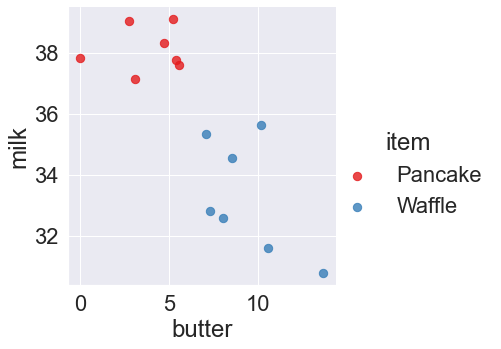

In [42]:
# Seaborn plot
sns.lmplot(x='butter',y='milk', data = df, hue='item',
               palette='Set1',fit_reg=False,scatter_kws={"s":70});

**Step 4**: Fit the SVM model

In [25]:
# Specify input and output for the model
X = df[['butter','milk']].values
y = np.where(df['item']=='Waffle', 0, 1)

# Fit the SVM model
# NOTE: "SVC" stands for support vector classifier
model = svm.SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

**Step 5**: Visualize the results

1.0


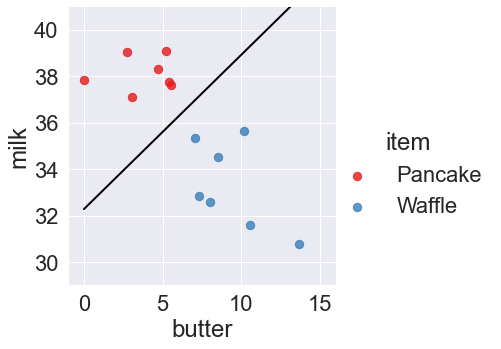

In [26]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 30)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the hyperplane
sns.lmplot(x='butter', y='milk', data=df, hue='item', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');
plt.ylim((29,41))
plt.xlim((-1,16))
print(model.score(X,y))

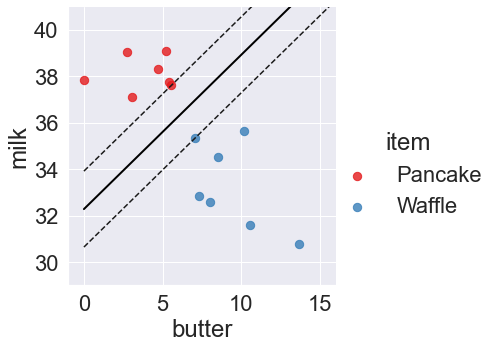

In [27]:
# Look at the margins and support vectors
sns.lmplot(x='butter', y='milk', data=df, hue='item', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.ylim((29,41))
plt.xlim((-1,16))
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

**Challenge**: [This recipe](https://www.food.com/recipe/basic-batter-waffles-110683) is 11.4% butter and 34.0% milk. Use the model we fit to determine whether this is a pancake or a waffle. 

Lets say we are looking at 

In [28]:
# Create a function to guess when a recipe is a pancake or a waffle
def pancake_or_waffle(butter, milk):
    if(model.predict([[butter, milk]]))==0:
        print('You\'re looking at a waffle recipe!')
    else:
        print('You\'re looking at a pancake recipe!')

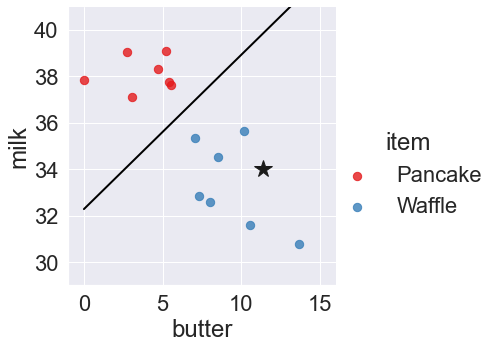

In [29]:
# Plot the point to visually see where the point lies
sns.lmplot(x='butter', y='milk', data=df, hue='item', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(11.4, 34.0, 'k*', markersize='18');
plt.ylim((29,41));
plt.xlim((-1,16));

In [30]:
# Predict if 7.1 parts butter, 35.3 milk
pancake_or_waffle(11.4, 34.0)

You're looking at a waffle recipe!


**Challenge**: [This recipe](https://lilluna.com/easy-pancake-recipe/) is 5.5% butter and 37.3% milk. Use the model we fit to determine whether this is a pancake or a waffle.

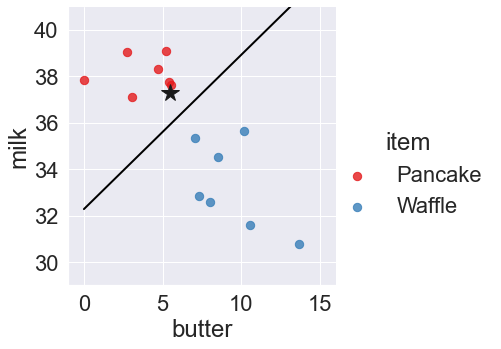

In [31]:
# Plot the point to visually see where the point lies
sns.lmplot(x='butter', y='milk', data=df, hue='item', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');
plt.plot(5.5, 37.3, 'k*', markersize='18');
plt.ylim((29,41));
plt.xlim((-1,16));

In [32]:
# Predict if 7.1 parts butter, 35.3 milk
pancake_or_waffle(5.5, 37.3)

You're looking at a pancake recipe!


In [34]:
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[1. 1. 1. 1. 1.]


In [36]:
cross_val_score(clf, X, y, cv=5)

array([1., 1., 1., 1., 1.])

In [ ]:
df2 = df.loc[df['spp'] == species_names[0]]

temp_prec = df2[['btemp','stemp']].values
occurence = df2['pres2'].values

# Fit the SVM model
model = svm.SVC(kernel='rbf')
clf = model.fit(temp_prec, occurence)

print(clf.score(temp_prec,occurence))

In [ ]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
model = svm.SVC(kernel='rbf')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

If you are interested, you can find the recipes used here! 


* one